# IRIS FLOWER CLASSIFICATION

##### IMPORTING IMPORTANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

##### IMPORTING DATASET

In [2]:
df=pd.read_csv(r"C:\resumes\king akshay\interenship\IRIS.csv")

In [3]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##### VISUALIZATION

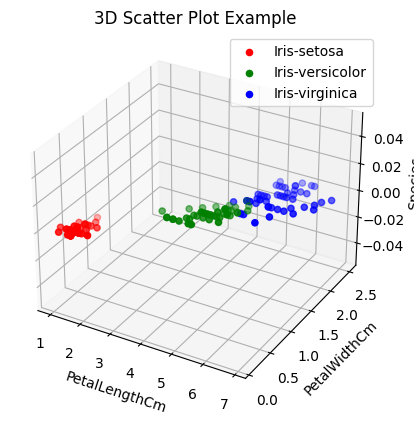

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Map species to colors
colors = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}

# Scatter plot with different colors for each species
for species, color in colors.items():
    subset = df[df['species'] == species]
    ax.scatter(subset['petal_length'], subset['petal_width'], label=species, c=color)

ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('PetalWidthCm')
ax.set_zlabel('Species')
ax.legend()

plt.title('3D Scatter Plot Example')
plt.show()

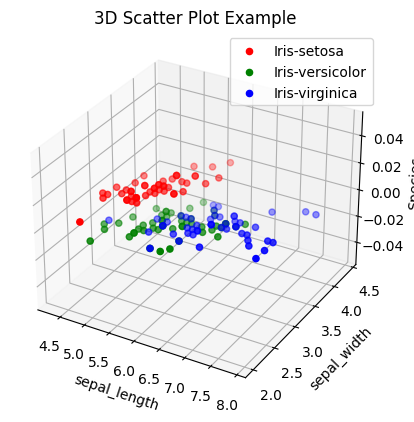

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Map species to colors
colors = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}

# Scatter plot with different colors for each species
for species, color in colors.items():
    subset = df[df['species'] == species]
    ax.scatter(subset['sepal_length'], subset['sepal_width'], label=species, c=color)

ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_zlabel('Species')
ax.legend()

plt.title('3D Scatter Plot Example')
plt.show()


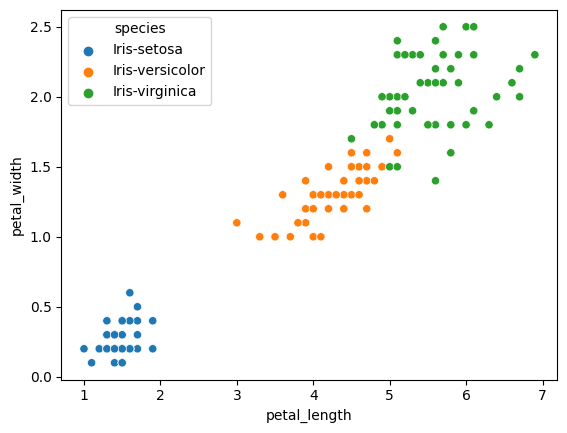

In [11]:


sns.scatterplot(data=df, x="petal_length", y="petal_width",hue="species");
     


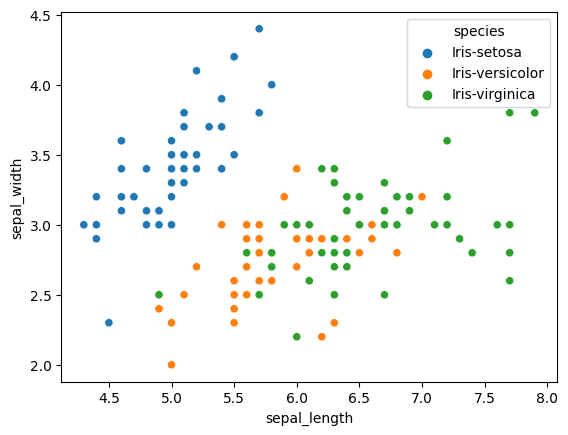

In [12]:

sns.scatterplot(data=df, x="sepal_length", y="sepal_width",hue="species");
     


##### Applying Elbow Technique

In [13]:
k_rng = range(1,10)
sse=[]

for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[[ 'petal_length', 'petal_width']])
  sse.append(km.inertia_)

In [14]:
sse

[550.6434666666667,
 86.40394533571005,
 31.387758974358977,
 19.499400899685114,
 13.933308757908756,
 11.056639971910453,
 9.213817958598737,
 7.833345054945056,
 6.557984461432288]

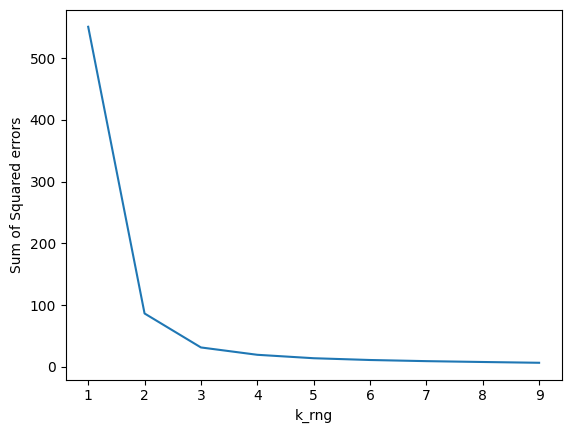

In [15]:
plt.xlabel('k_rng')
plt.ylabel("Sum of Squared errors")
plt.plot(k_rng, sse)

##### Applying KMean Algorithm

In [16]:
km = KMeans(n_clusters=3,random_state=0,)
y_predicted = km.fit_predict(df[['petal_length','petal_width']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
df['cluster']=y_predicted
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,1
148,6.2,3.4,5.4,2.3,Iris-virginica,1


#####  Accuracy measure


In [18]:
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

# Now you can use confusion_matrix
cm = confusion_matrix(df['species_encoded'], df['cluster'])
print(cm)


[[50  0  0]
 [ 0  2 48]
 [ 0 46  4]]


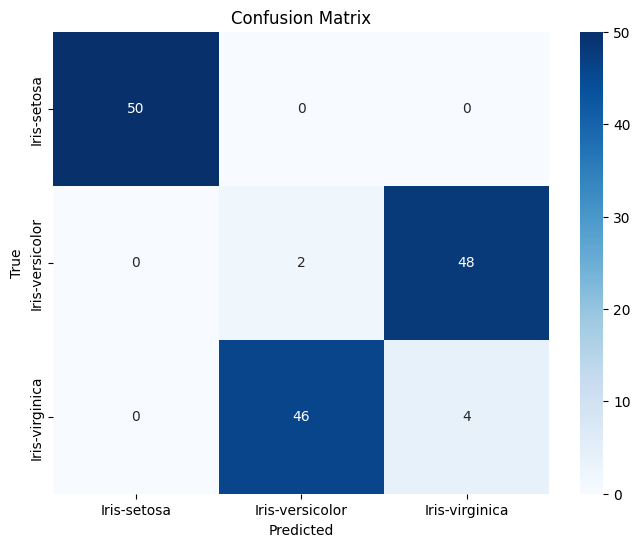

In [19]:
true_labels = df['species']
predicted_labels = df['cluster']

# Convert true_labels to numeric using label encoding
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)

# Now you can use confusion_matrix
cm = confusion_matrix(true_labels_encoded, predicted_labels)
class_labels = label_encoder.classes_  # Get class labels from the label encoder

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
